# 1. Import Library

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [3]:
### read data
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
### show train & test data's shape
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
### normalize image's features
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
### transform labels into Onehot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [7]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [10]:
#卷積層1

In [11]:
### 第一層卷積層：濾出32個影像，filter為3X3，輸入為三維32*32，3色(RGB)
### 激活函數用ReLU可以得到較好結果，padding=same使影像大小不變。
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [12]:
### 第一次drop out，避免overfitting
model.add(Dropout(rate=0.25))

In [13]:
### 用最大池化來縮減資料，影像數量不變(32個)，大小變為16*16
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#卷積層2與池化層2

In [15]:
### 第二層卷積層，影像數量變為64個影像，大小不變(16*16)
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [16]:
### 第二次drop out
model.add(Dropout(0.25))

In [17]:
### 第二次池化，影像數量不變(64個)，大小變為8*8
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
#Step3	建立神經網路(平坦層、隱藏層、輸出層)

In [19]:
### 資料變為一維(8*8*64 = 4096 個神經元)，並進行第三次drop out
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [20]:
### 建立隱藏層(1024個神經元)後，第四次drop out
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [21]:
###輸出為10個神經元(10種類別)，使用softmax將輸出轉換為預測每個類別的機率
model.add(Dense(10, activation='softmax'))

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [23]:
### 訓練時 Epoch有時太多，要跑太久，如果當機就功虧一簣，所以可將Epoch變少分段訓練，每次訓練後將模型權重儲存，作為解決方式。
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [25]:
### 讀入訓練集資料(50000筆)切為80％訓練(40000筆)
### 訓練10個週期，一批次128筆(大約分為313批次)
### verbose = 1，顯示進度條
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 163s - loss: 1.5034 - acc: 0.4588 - val_loss: 1.2777 - val_acc: 0.5817
Epoch 2/10
40000/40000 [==============================] - 162s - loss: 1.1366 - acc: 0.5954 - val_loss: 1.1105 - val_acc: 0.6383
Epoch 3/10
40000/40000 [==============================] - 162s - loss: 0.9797 - acc: 0.6567 - val_loss: 1.0061 - val_acc: 0.6673
Epoch 4/10
40000/40000 [==============================] - 163s - loss: 0.8746 - acc: 0.6929 - val_loss: 0.9625 - val_acc: 0.6899
Epoch 5/10
40000/40000 [==============================] - 163s - loss: 0.7812 - acc: 0.7237 - val_loss: 0.8848 - val_acc: 0.7052
Epoch 6/10
40000/40000 [==============================] - 163s - loss: 0.7034 - acc: 0.7528 - val_loss: 0.8580 - val_acc: 0.7189
Epoch 7/10
40000/40000 [==============================] - 164s - loss: 0.6253 - acc: 0.7816 - val_loss: 0.8205 - val_acc: 0.7282
Epoch 8/10
40000/40000 [=======================

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

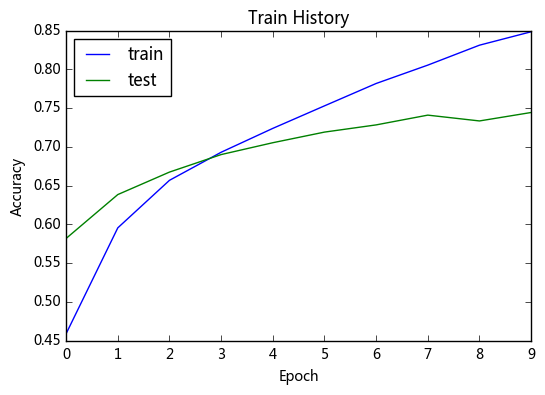

In [27]:
### 畫出訓練之準確率結果
show_train_history('acc','val_acc')

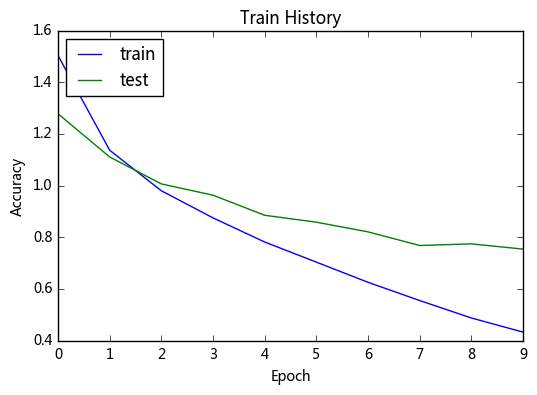

In [28]:
### 畫出訓練之誤差結果
show_train_history('loss','val_loss')

# 評估模型準確率

In [29]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.73760000000000003

# 進行預測

In [30]:
prediction=model.predict_classes(x_img_test_normalize)

10000/10000 [==============================] - 11s    


In [31]:
prediction[:10]

array([3, 8, 8, 8, 6, 6, 1, 6, 3, 1])

# 查看預測結果

In [32]:
### 建立label字典
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [33]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

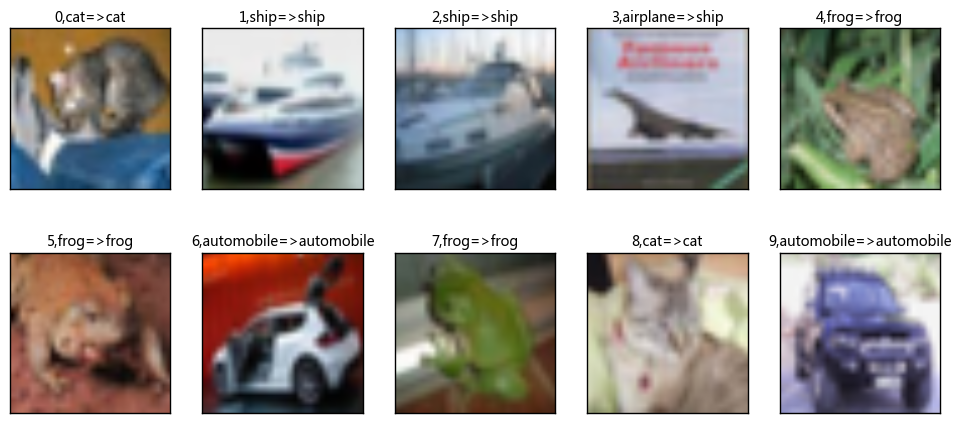

In [34]:
### 3認錯
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [35]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [36]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


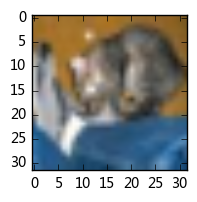

airplane Probability:0.003534749
automobile Probability:0.003903717
bird Probability:0.015363966
cat Probability:0.530931354
deer Probability:0.005599256
dog Probability:0.394711703
frog Probability:0.025675453
horse Probability:0.010123541
ship Probability:0.006771585
truck Probability:0.003384710


In [37]:
### 顯示預測結果及各分類的機率
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: ship


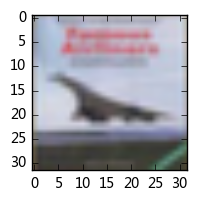

airplane Probability:0.412524581
automobile Probability:0.002157263
bird Probability:0.081410669
cat Probability:0.003393046
deer Probability:0.009805630
dog Probability:0.000078119
frog Probability:0.000147400
horse Probability:0.000117405
ship Probability:0.489832163
truck Probability:0.000533728


In [38]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

# confusion matrix

In [39]:
prediction.shape

(10000,)

In [40]:
### test data為二維資料
y_label_test.shape

(10000, 1)

In [41]:
y_label_test

array([[3],
       [8],
       [8],
       ..., 
       [5],
       [1],
       [7]])

In [42]:
### 因為pandas的crosstab的輸入必須都是一維陣列，所以將test data降維
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [43]:
######## 將交叉表轉換為百分比更直觀！
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict']).apply(lambda r: r/r.sum(),axis = 1)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,0.786,0.008,0.069,0.011,0.024,0.007,0.017,0.009,0.047,0.022
1,0.019,0.831,0.020,0.017,0.001,0.011,0.018,0.004,0.022,0.057
2,0.048,0.001,0.662,0.036,0.095,0.059,0.074,0.017,0.004,0.004
3,0.014,0.004,0.096,0.475,0.085,0.200,0.095,0.021,0.004,0.006
4,0.016,0.003,0.073,0.032,0.768,0.022,0.058,0.022,0.006,0.000
5,0.010,0.001,0.059,0.118,0.062,0.667,0.048,0.029,0.003,0.003
6,0.002,0.005,0.037,0.039,0.027,0.018,0.869,0.001,0.002,0.000
7,0.010,0.001,0.042,0.022,0.084,0.068,0.016,0.754,0.002,0.001
8,0.062,0.026,0.027,0.014,0.011,0.016,0.015,0.004,0.812,0.013


In [44]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Save model to JSON

In [45]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [46]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [47]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
